# Importing packages

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Webscraping from carbuyer


In [ ]:
carbuyer_data = []

for page in range(150):
  try:
    domain = 'https://marketplace.carbuyer.com.sg/used-cars/search/?page='
    page_num = str(page)
    url = domain + page_num
    res = requests.get(url)
    soup = BeautifulSoup(res.content, 'html.parser')

    # getting all the listings on the page
    listings = soup.find_all('div', class_ = 'card-body')
    
    for listing in listings:
      # Extracting title
      title = listing.find_all("h4")[0].text.strip() # Fill in the element and class 

      # Extracting price
      price_tag = listing.find_all("div", class_="price")
      price = price_tag[0].find("p").text.strip()[1:]
      try:
        instalment = price_tag[0].find("small").text.strip()[1:][:-3]
      except:
        instalment = "N/A"
      depreciation = listing.find_all("div", class_="spec-item depr")[0].text.strip()[1:][:-3] 
      mileage = listing.find_all("div", class_="spec-item")[1].text.strip()
      owner = listing.find_all("div", class_="spec-item")[2].text.strip()[0]
      if mileage != 'N/A' :
        mileage = mileage[:-2]
      # Extracting size and psf
      #detail_values = listing.find_all("", class_="")[0].text.strip() # Fill in the element and class 
      #size = detail_values.split("/")[0].strip()
      #mileage = detail_values.split("/")[1].strip()    

      date_tag = listing.find_all("div", class_="spec-item reg-date")     
      purchase_date = date_tag[0].text.strip()
      #expiration = listing.find_all("span", style_="color:#A1A1A1;margin-left:5px")[0].text.strip()
      try:
        remaining_coe = date_tag[0].find("small").text.strip()
      except:
        remaining_coe = "NA"
      if remaining_coe != "NA" :
        purchase_date = purchase_date[0:10]
        remaining_coe = remaining_coe[1:][:-11]

      # Extracting agent name
      #agent = listing.find_all("", class_="")[0].text.strip() # Fill in the element and class 

      # Extracting description
      #description = listing.find_all("", class_="")[0].text.strip() # Fill in the element and class 


      row = {
          "title": title,
          "price": price,
          "instalment/month": instalment,
          "owner": owner,
          "mileage": mileage,
          "depreciation": depreciation,
          "registered_date": purchase_date,
          "remaining_coe": remaining_coe
      }

      carbuyer_data.append(row)

  except IndexError:
    print("break!")
    break

In [ ]:
car_df = pd.DataFrame(carbuyer_data)

##Data cleaning

In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2374 entries, 0 to 2373
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             2374 non-null   object        
 1   price             2374 non-null   int64         
 2   instalment/month  2374 non-null   int64         
 3   owner             2374 non-null   int64         
 4   mileage           1714 non-null   float64       
 5   depreciation      2374 non-null   int64         
 6   registered_date   2374 non-null   datetime64[ns]
 7   remaining_coe     2374 non-null   int64         
 8   coe_years         2374 non-null   int64         
 9   coe_months        2374 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(1)
memory usage: 185.6+ KB


In [ ]:
car_df

,brand,title,price,instalment/month,owner,mileage,depreciation,registered_date,remaining_coe,coe_years,coe_months
0,Mercedes,Mercedes Benz E220D Se Premium Auto,129999,1681,1,89000.0,23646,2017-09-29,52,4,4
1,Mitsubishi,Mitsubishi Attrage 1.2 Cvt,97800,835,2,11000.0,10485,2022-06-13,109,9,1
2,Mazda,Mazda Mazda3 4-Door Sedan 1.5L Sp.6Eat,35000,889,3,110190.0,15314,2015-06-25,25,2,1
3,Honda,Honda Vezel Hybrid 1.5X Auto,65800,950,3,83000.0,16300,2017-03-29,46,3,10
4,Honda,Honda Fit Hybrid 1.5 Auto,85800,825,1,62000.0,13224,2019-10-07,73,6,1
...,...,...,...,...,...,...,...,...,...,...,...
2369,Porsche,Porsche Cayenne V6 E5 Tip,98888,1786,1,164888.0,166377,2013-08-14,0,0,0
2370,Audi,Audi A4 Avant 3.2 Fsi Qu S/L At Abs D/Ab Hid,86800,887,2,112000.0,15137,2009-02-26,68,5,8
2371,Mercedes,Mercedes Benz C180 Avantgarde (R17 Led),83800,1851,2,129000.0,26379,2015-06-11,29,2,5
2372,Maserati,Maserati Granturismo Sport,180800,5961,4,51000.0,47037,2015-08-01,19,1,7


In [ ]:
car_df['title'] = car_df['title'].str.title()

In [ ]:
#changing remaining_coe to months
car_df[['coe_years', 'coe_months']] = car_df.remaining_coe.str.split(" yrs ", expand = True)
car_df['coe_years'].replace('NA', 0, inplace=True)
car_df['coe_months'].replace([None], 0, inplace=True)
car_df['coe_years'] = car_df['coe_years'].astype('int')
car_df['coe_months'] = car_df['coe_months'].astype('int')
car_df['remaining_coe'] = car_df['coe_years'] * 12 + car_df['coe_months']

In [ ]:
car_df['registered_date'] = pd.to_datetime(car_df['registered_date'])

<ipython-input-92-bfdea12640a5>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  car_df['registered_date'] = pd.to_datetime(car_df['registered_date'])


In [ ]:
#changing the numbers with commas to integers
car_df['price'].replace(',','', regex=True, inplace=True)
car_df['price'] = car_df['price'].astype('int')

car_df['instalment/month'].replace(',','', regex=True, inplace=True)
car_df['instalment/month'] = car_df['instalment/month'].astype('int')

car_df['mileage'].replace(',','', regex=True, inplace=True)
car_df['mileage'].replace('N/A', np.nan, regex=True, inplace=True)
car_df['mileage'] = car_df['mileage'].astype('float')

car_df['depreciation'].replace(',','', regex=True, inplace=True)
car_df['depreciation'] = car_df['depreciation'].astype('int')

In [ ]:
car_df['owner'] = car_df['owner'].astype('int')

In [ ]:
#pull out the brand of the cars
brand_col = car_df['title'].str.split(' ').str[0]
car_df.insert(loc = 0, column = "brand", value = brand_col)

In [ ]:
brand_col

0            Mercedes
1          Mitsubishi
2               Mazda
3               Honda
4               Honda
            ...      
2369          Porsche
2370             Audi
2371         Mercedes
2372         Maserati
2373    Mercedes-Benz
Name: title, Length: 2374, dtype: object

In [ ]:
car_df.to_csv('car_df.csv', index = False)

In [3]:
car_df = pd.read_csv('car_df.csv')

In [4]:
car_df

,brand,title,price,instalment/month,owner,mileage,depreciation,registered_date,remaining_coe,coe_years,coe_months
0,Mercedes,Mercedes Benz E220D Se Premium Auto,129999,1681,1,89000.0,23646,2017-09-29,52,4,4
1,Mitsubishi,Mitsubishi Attrage 1.2 Cvt,97800,835,2,11000.0,10485,2022-06-13,109,9,1
2,Mazda,Mazda Mazda3 4-Door Sedan 1.5L Sp.6Eat,35000,889,3,110190.0,15314,2015-06-25,25,2,1
3,Honda,Honda Vezel Hybrid 1.5X Auto,65800,950,3,83000.0,16300,2017-03-29,46,3,10
4,Honda,Honda Fit Hybrid 1.5 Auto,85800,825,1,62000.0,13224,2019-10-07,73,6,1
...,...,...,...,...,...,...,...,...,...,...,...
2369,Porsche,Porsche Cayenne V6 E5 Tip,98888,1786,1,164888.0,166377,2013-08-14,0,0,0
2370,Audi,Audi A4 Avant 3.2 Fsi Qu S/L At Abs D/Ab Hid,86800,887,2,112000.0,15137,2009-02-26,68,5,8
2371,Mercedes,Mercedes Benz C180 Avantgarde (R17 Led),83800,1851,2,129000.0,26379,2015-06-11,29,2,5
2372,Maserati,Maserati Granturismo Sport,180800,5961,4,51000.0,47037,2015-08-01,19,1,7


##Data visualisation

In [20]:
car_df['brand'].value_counts()

Toyota           391
Honda            302
Mercedes-Benz    244
Bmw              195
Nissan           149
                ... 
Daihatsu           1
Rover              1
Rolls              1
Maxus              1
Yutong             1
Name: brand, Length: 61, dtype: int64

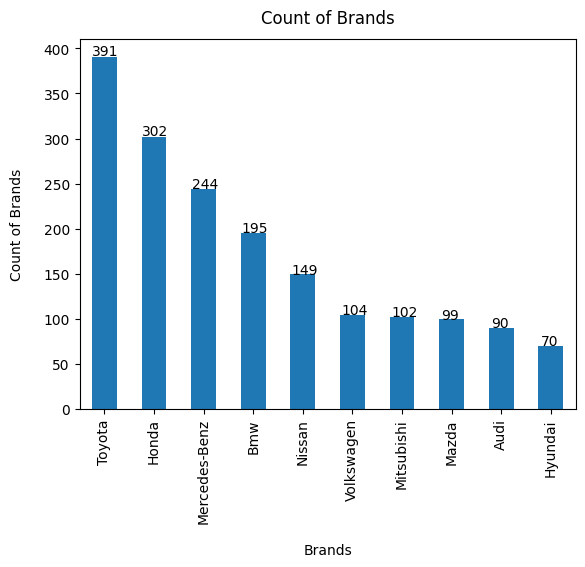

In [10]:
#Distribution of brands and their popularity
ax = car_df['brand'].value_counts().head(10).plot(kind = 'bar')
plt.xlabel("Brands", labelpad=14)
plt.ylabel("Count of Brands", labelpad=14)
plt.title("Count of Brands", y=1.02);
for p in ax.patches:
  ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


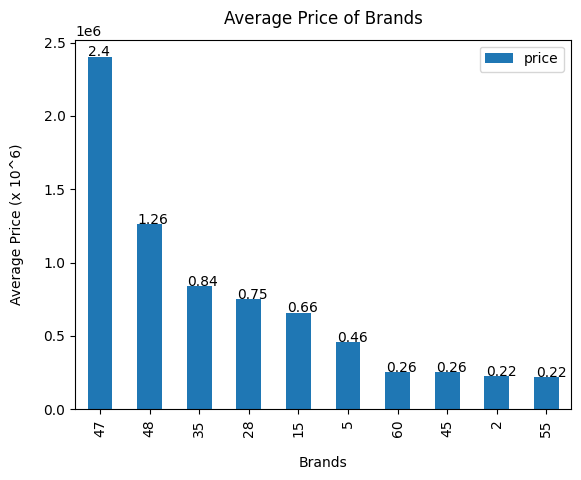

In [47]:
brand_df = car_df.groupby('brand', as_index=False)['price'].mean().sort_values('price', ascending=False).head(10)
ax = brand_df.plot(kind = 'bar')
plt.xlabel("Brands", labelpad=14)
plt.ylabel("Average Price (x 10^6)", labelpad=14)
plt.title("Average Price of Brands", y=1.02);
for p in ax.patches:
  ax.annotate(str(round(p.get_height()/1000000, 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

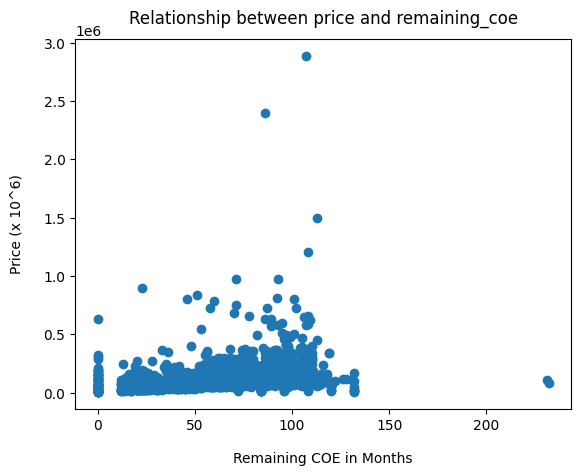

In [13]:
#Relationship between price and remaining_coe
plt.scatter(car_df['remaining_coe'], car_df['price'])
plt.xlabel("Remaining COE in Months", labelpad=14)
plt.ylabel("Price (x 10^6)", labelpad=14)
plt.title("Relationship between price and remaining_coe", y=1.02);

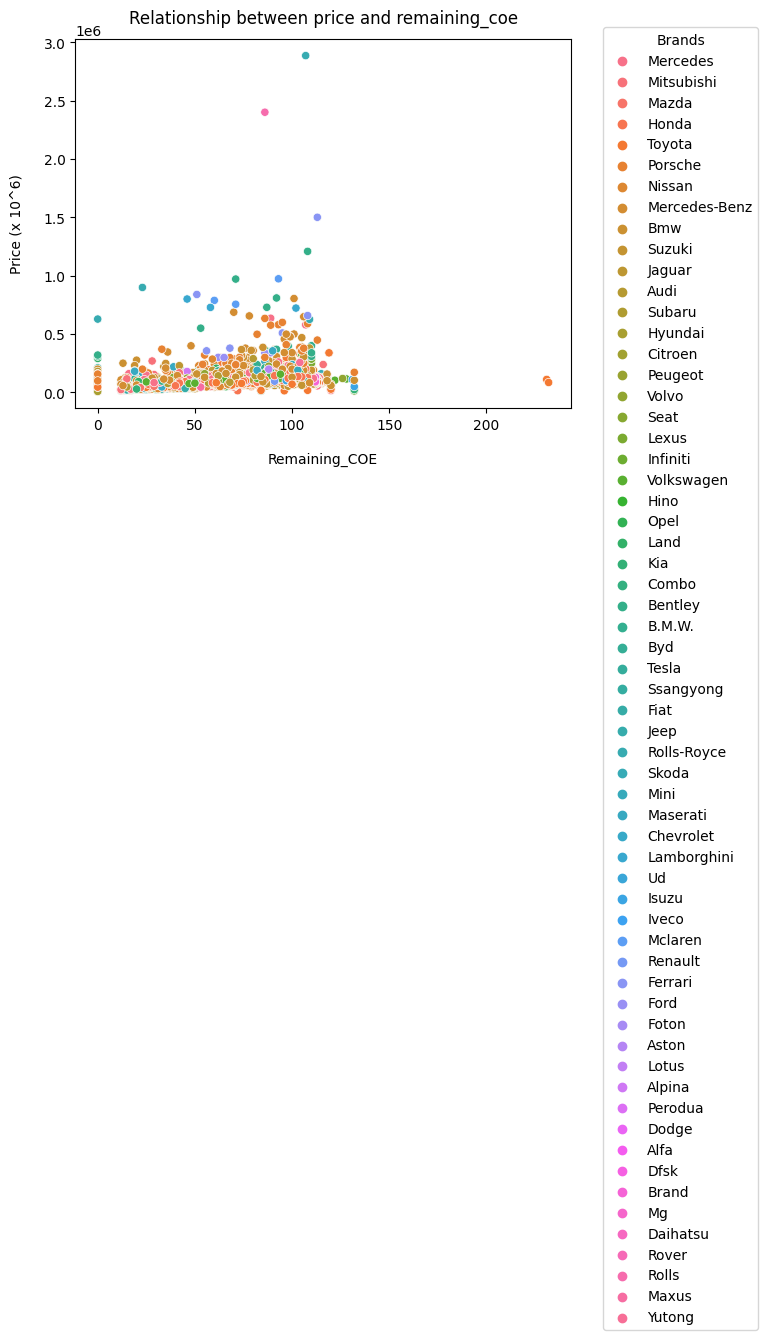

In [26]:
#colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])
sns.scatterplot(data=car_df, x='remaining_coe', y='price',  hue='brand')
plt.xlabel("Remaining_COE", labelpad=14)
plt.ylabel("Price (x 10^6)", labelpad=14)
plt.title("Relationship between price and remaining_coe", y=1.02);
plt.legend(bbox_to_anchor=(1.05, 1.05),loc=2,title='Brands')

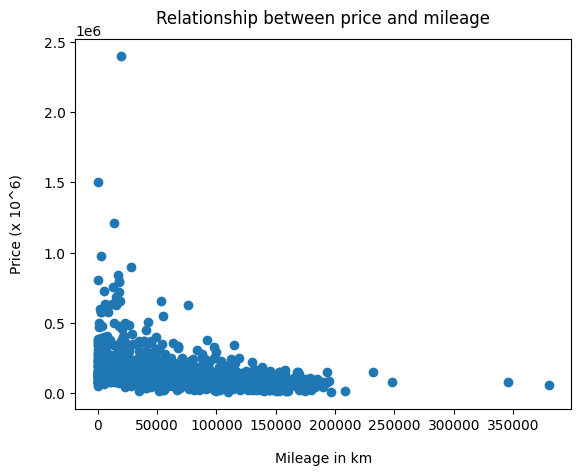

In [30]:
#Relationship between price and mileage
plt.scatter(car_df['mileage'], car_df['price'])
plt.xlabel("Mileage in km", labelpad=14)
plt.ylabel("Price (x 10^6)", labelpad=14)
plt.title("Relationship between price and mileage", y=1.02);

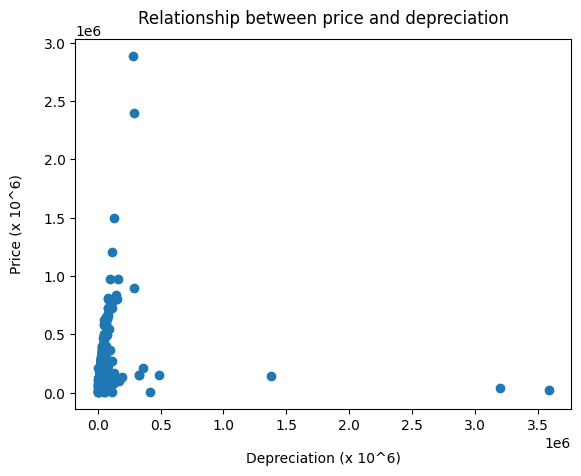

In [31]:
#Relationship between price and depreciation
plt.scatter(car_df['depreciation'], car_df['price'])
plt.xlabel("Depreciation (x 10^6)", labelpad=14)
plt.ylabel("Price (x 10^6)", labelpad=14)
plt.title("Relationship between price and depreciation", y=1.02);